In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oil-spill-detection/oil_spill.csv


In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('../input/oil-spill-detection/oil_spill.csv')
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [5]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

rfc = RandomForestClassifier(n_estimators=2048,max_depth=1024,random_state=1)
dtc = DecisionTreeClassifier(max_depth=64,random_state=1)
gbc = GradientBoostingClassifier(n_estimators=2048,learning_rate=0.1)
gnb = GaussianNB(var_smoothing=0.0001)

In [9]:
rfc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
gbc.fit(x_train,y_train)
gnb.fit(x_train,y_train)

GaussianNB(var_smoothing=0.0001)

In [19]:
y_pred_rfc = rfc.predict(x_test)
y_pred_dtc = dtc.predict(x_test)
y_pred_gbc = gbc.predict(x_test)
y_pred_gnb = gnb.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
cm_gbc = confusion_matrix(y_test,y_pred_gbc)
cm_gnb = confusion_matrix(y_test,y_pred_gnb)
print(cm_rfc)
print(cm_dtc)
print(cm_gbc)
print(cm_gnb)

[[176   0]
 [  7   5]]
[[173   3]
 [  9   3]]
[[175   1]
 [  7   5]]
[[176   0]
 [ 12   0]]


In [12]:
""" We can see here that the Random Forest Regression and Gradient_Boosting_Classifier results best on this dataset"""

"""Let's now visualize our Results"""

"Let's now visualize our Results"

<AxesSubplot:>

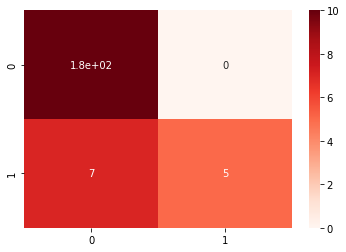

In [13]:
"""For Random Forestr Regression..."""
sns.heatmap(cm_rfc,cmap="Reds",annot=True,vmax=10,vmin=0)


<AxesSubplot:>

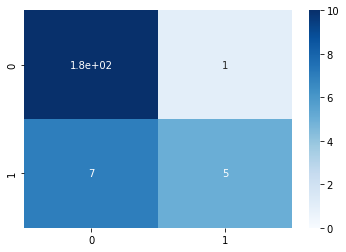

In [14]:
"""For Gradient Boosting Classifier..."""
sns.heatmap(cm_gbc,cmap="Blues",annot=True,vmax=10,vmin=0)

<AxesSubplot:>

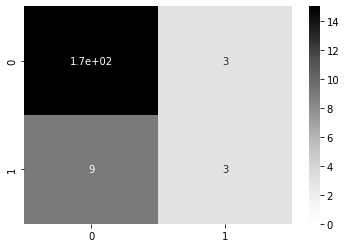

In [15]:
"""For Decision Tree Classifier..."""
sns.heatmap(cm_dtc,cmap="Greys",annot=True,vmax=15,vmin=0)

<AxesSubplot:>

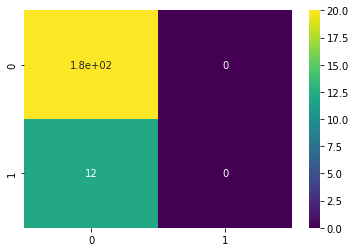

In [16]:
"""For GaussianNB ..."""
sns.heatmap(cm_gnb,cmap="viridis",annot=True,vmax=20,vmin=0)

In [17]:
"""Thus we have acheived 97% Accuracy by tunig the attrributes of Random Forest Classifier"""
"""Thank Your for taking a look at my Notebook"""
"""Pplease upvote this  😁😁"""

'Pplease upvote this  😁😁'

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
y_pred = model.predict(x_test)

In [28]:
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Recall: 0.08333333333333333


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [30]:
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
# Make predictions
y_pred = model.predict(x_test)

In [33]:
# Calculate precision
precision = precision_score(y_test, y_pred)

print("Precision:", precision)

Precision: 0.16666666666666666


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9148936170212766


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [49]:
# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

print("F1-score:", f1)

F1-score: 0.1111111111111111
